In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import cv2
import pickle
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Activation,Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adadelta
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
path = "C:\\Users\\Sudo_kill\\Desktop\\int 1\\images\\"
img_x = 50
img_y = 50

In [3]:
l = 'Toyota0512_small.jpg'

re.findall(r'(\w+?)(\d+)', l)[0][0]

'Toyota'

In [48]:
d ='Volvo3215_small.jpg'

re.findall(r'(\w+?)(\d+)', d)[0][0]

'Volvo'

In [5]:
logos =[]

for img in os.listdir(path):
    print(img)
    break

Alfa Romeo10882_small.jpg


In [6]:
logos =[]

for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    print(logo)
    break

Romeo


In [49]:
for img in os.listdir(path):
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    print(i.shape)
    print(i)
    break

(7500,)
[1 0 2 ... 0 0 0]


In [8]:
logos =[]
images =[]

for img in os.listdir(path):
    logo = re.findall(r'(\w+?)(\d+)',img)[0][0]
    i = np.array(np.array(Image.open(path+img).convert("RGB")).flatten(),order='F',dtype='uint8')
    logos.append(logo)
    images.append(i)

In [9]:
len(logos)

20778

In [10]:
len(images)

20778

In [11]:
np.array(images).shape

(20778, 7500)

In [12]:
cars = np.unique(np.array(logos))
cars

array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep',
       'Kia', 'Lada', 'Lancia', 'Lexus', 'Maserati', 'Mazda', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault',
       'Romeo', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype='<U10')

In [13]:
len(cars)

39

In [14]:
x= np.array(images)
y = np.array(logos)

In [15]:
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()



In [16]:
x = x/255.0

In [17]:
x[1]

array([0.91372549, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [18]:
data, labels = shuffle(x, y, random_state=42) 
train_data = [data, labels]

(20778, 7500) (20778,)


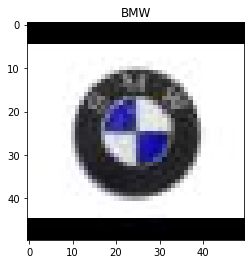

In [19]:
i = 190
print(train_data[0].shape, train_data[1].shape)
plt.imshow(data[i].reshape(img_x, img_y, 3))
plt.title(labels[i])
plt.show()

In [20]:
otr = OneHotEncoder()
y = otr.fit_transform(train_data[1].reshape(-1,1)).toarray()

In [21]:
y.shape

(20778, 39)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_data[0], y, test_size=0.2)

In [23]:
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)

In [24]:
X_train.shape

(16622, 50, 50, 3)

In [25]:
y_train.shape

(16622, 39)

In [26]:
X_test.shape

(4156, 50, 50, 3)

(50, 50, 3) (39,)


C:\Users\Sudo_kill\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


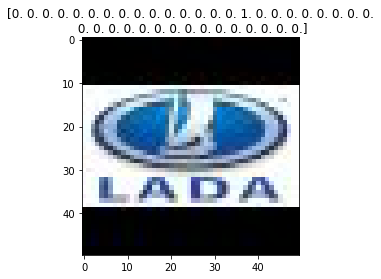

In [27]:
i = 36
print(X_train[i].shape, y_train[i].shape)
plt.imshow(X_train[i])
plt.title(y_train[i])
plt.show()

In [28]:
datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,zoom_range=0.2,vertical_flip=0.3)

datagen.fit(X_train)

(50, 50, 3) (39,)


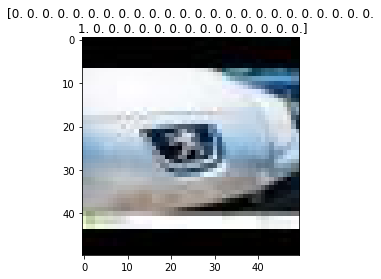

In [29]:
i = 15
print(X_train[i].shape, y_train[i].shape)
plt.imshow(X_train[i])
plt.title(y_train[i])
plt.show()

In [30]:
len(cars)

39

In [31]:
batch_size = 120
n_classes = len(cars)
epochs = 5
n_channels =3

In [32]:
model = Sequential()
model.add(Conv2D(32, (3,3),input_shape=(img_x,img_y,n_channels),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),padding='same',activation='relu') ,)
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(39,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [33]:
opt = Adam()

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])

In [34]:
model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True,seed=100),steps_per_epoch=X_train.shape[0]//batch_size,epochs=epochs,validation_data=(X_test,y_test),workers=4)

<ipython-input-34-57364170b7c9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size,shuffle=True,seed=100),steps_per_epoch=X_train.shape[0]//batch_size,epochs=epochs,validation_data=(X_test,y_test),workers=4)


Epoch 1/5
138/138 [==============================] - 34s 245ms/step - loss: 3.6108 - categorical_accuracy: 0.0463 - val_loss: 3.5264 - val_categorical_accuracy: 0.0606
Epoch 2/5
138/138 [==============================] - 37s 265ms/step - loss: 3.4916 - categorical_accuracy: 0.0735 - val_loss: 3.3272 - val_categorical_accuracy: 0.1102
Epoch 3/5
138/138 [==============================] - 41s 292ms/step - loss: 3.3196 - categorical_accuracy: 0.1215 - val_loss: 3.1052 - val_categorical_accuracy: 0.1764
Epoch 4/5
138/138 [==============================] - 43s 309ms/step - loss: 3.1715 - categorical_accuracy: 0.1597 - val_loss: 2.9711 - val_categorical_accuracy: 0.2043
Epoch 5/5
138/138 [==============================] - 40s 292ms/step - loss: 3.0733 - categorical_accuracy: 0.1829 - val_loss: 2.8976 - val_categorical_accuracy: 0.2252


In [35]:
scores = model.evaluate(X_test, y_test) 
print("Accuracy test: %.2f%%" % (scores[1]*100))

130/130 [==============================] - 3s 22ms/step - loss: 2.8976 - categorical_accuracy: 0.2252
Accuracy test: 22.52%


In [36]:
image = np.expand_dims(X_test[48], axis=0)
z = model.predict(image)
z

array([[0.00308802, 0.19627665, 0.006231  , 0.00218036, 0.01632213,
        0.00515143, 0.00263418, 0.0094618 , 0.01627496, 0.03101678,
        0.00138668, 0.0045554 , 0.00051696, 0.00288842, 0.00482383,
        0.015733  , 0.01393929, 0.00220277, 0.03058652, 0.0072442 ,
        0.00574777, 0.00441735, 0.00791736, 0.03934011, 0.00651683,
        0.03839865, 0.04553816, 0.15225692, 0.00726316, 0.17714995,
        0.00119894, 0.0113701 , 0.02468301, 0.03152543, 0.01141519,
        0.00683422, 0.00253545, 0.04971488, 0.00366207]], dtype=float32)

In [37]:
h = z.max()
h

0.19627665

In [38]:
result = np.where(z == h)
result
result[1]
y = result[1]
y[0]
B = y[0]
B

1

In [39]:
cars[B]

'BMW'

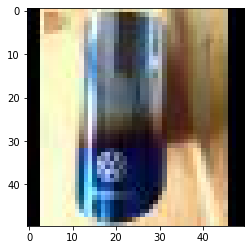

In [40]:
plt.imshow(X_test[48])
plt.show()

In [41]:
P =int(input("Enter your value: "))


Enter your value: 800


In [42]:
image = np.expand_dims(X_test[P], axis=0)
z = model.predict(image)
z

array([[0.07832583, 0.00387404, 0.0231482 , 0.04047291, 0.0149226 ,
        0.02584899, 0.01068254, 0.01384766, 0.00691133, 0.01584637,
        0.05364745, 0.04169745, 0.03464259, 0.03597754, 0.03310383,
        0.01228549, 0.00342685, 0.07897082, 0.01657198, 0.03252192,
        0.0649114 , 0.02121336, 0.03221374, 0.03592839, 0.03406536,
        0.00210264, 0.03066562, 0.00749046, 0.01881247, 0.00205489,
        0.01613581, 0.00651748, 0.01347078, 0.02154641, 0.0070844 ,
        0.03467106, 0.05576118, 0.011217  , 0.00741116]], dtype=float32)

In [43]:
h = z.max()

In [44]:
result = np.where(z == h)
result
result[1]
y = result[1]
y[0]
B = y[0]
B

17

In [45]:
cars[B]

'Lexus'

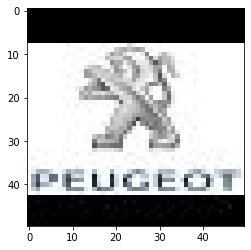

In [46]:
plt.imshow(X_test[P])
plt.show()